In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (9, 5)

In [3]:
sns.set()

## Learning curves with and without different masks at training

In [4]:
df_learning_curves = pd.read_csv('updnet_learning_curves.csv')

<IPython.core.display.Javascript object>


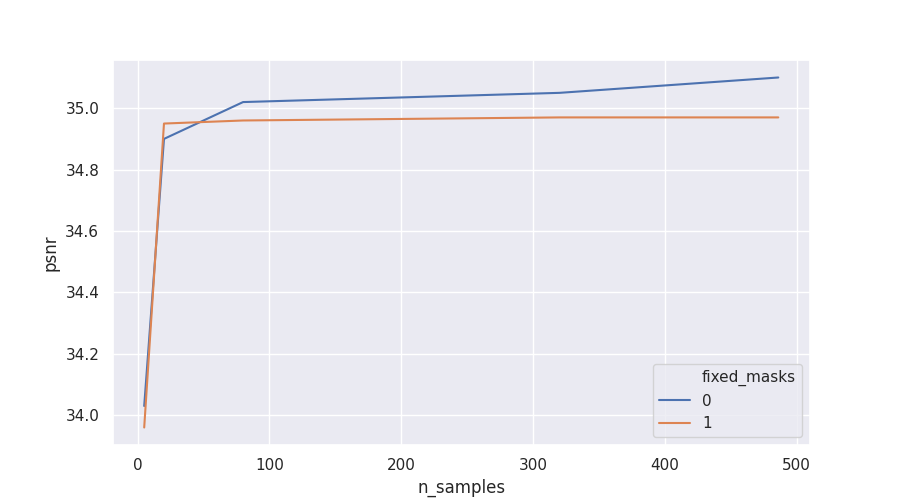

In [5]:
plt.figure()
sns.lineplot(data=df_learning_curves, x='n_samples', y='psnr', hue='fixed_masks')
plt.savefig('updnet_learning_curves.png')

## Denoising performance function of n params

In [6]:
df_n_params = pd.read_csv('n_params_model.csv', index_col=0)
df_denoising_res = pd.read_csv('denoising_results_None.csv', index_col=0)
df_denoising_res_didn = pd.read_csv('denoising_results_None_DIDN.csv', index_col=0)

In [7]:
df_denoising_res[df_denoising_res['model_name'] == 'DIDN'] = df_denoising_res_didn.values

In [8]:
df_denoisers = df_denoising_res.merge(df_n_params, on=['model_name', 'model_size'])

In [9]:
df_denoisers['model_denomination'] = df_denoisers[['model_name', 'model_size']].agg('-'.join, axis=1)

<IPython.core.display.Javascript object>


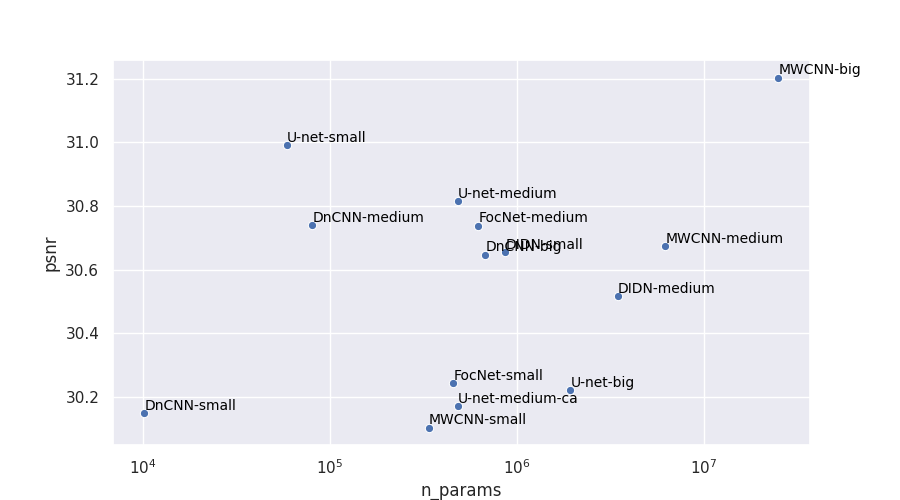

In [10]:
plt.figure()
plt.xscale('log')
p = sns.scatterplot(x='n_params', y='psnr', data=df_denoisers)
for line in range(0, df_denoisers.shape[0]):
    p.text(
        df_denoisers.n_params[line], 
        df_denoisers.psnr[line]+0.01, 
        df_denoisers.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )

# Reconstruction performance function of denoising performance

In [29]:
# df_reconstruction = pd.read_csv('reconstruction_results_None.csv', index_col=0)
df_reconstruction = pd.read_csv('reconstruction_results_af_2.csv', index_col=0)
# df_reconstruction_didn = pd.read_csv('reconstruction_results_None_DIDN.csv', index_col=0)
# df_reconstruction[df_reconstruction['model_name'] == 'DIDN'] = df_reconstruction_didn.values
df_reconstruction['psnr_recon'] = df_reconstruction['psnr']
df_reconstruction = df_reconstruction.drop('psnr', axis=1)
df_reconstruction['ssim_recon'] = df_reconstruction['ssim']
df_reconstruction = df_reconstruction.drop('ssim', axis=1)

In [31]:
df_all = df_denoisers.merge(df_reconstruction, on=['model_name', 'model_size'])

In [32]:
df_all

,model_name,model_size,psnr,ssim,n_params,model_denomination,psnr_recon,ssim_recon
0,DIDN,medium,30.516462,0.688713,3450848,DIDN-medium,37.978504,0.899347
1,DIDN,small,30.654343,0.698549,865264,DIDN-small,37.939903,0.898588
2,DnCNN,big,30.647631,0.690485,677450,DnCNN-big,37.886719,0.897657
3,DnCNN,medium,30.740580,0.695892,80362,DnCNN-medium,37.793777,0.896469
4,DnCNN,small,30.149007,0.666011,10154,DnCNN-small,37.706463,0.896347
5,FocNet,medium,30.738389,0.704886,621698,FocNet-medium,37.766164,0.898610
6,FocNet,small,30.243096,0.671932,455674,FocNet-small,37.579900,0.899110
7,MWCNN,big,31.203525,0.713605,24932746,MWCNN-big,37.957500,0.898677
8,MWCNN,medium,30.673719,0.691842,6217930,MWCNN-medium,38.021805,0.900472
9,MWCNN,small,30.104372,0.670601,338122,MWCNN-small,37.948799,0.898356


<IPython.core.display.Javascript object>


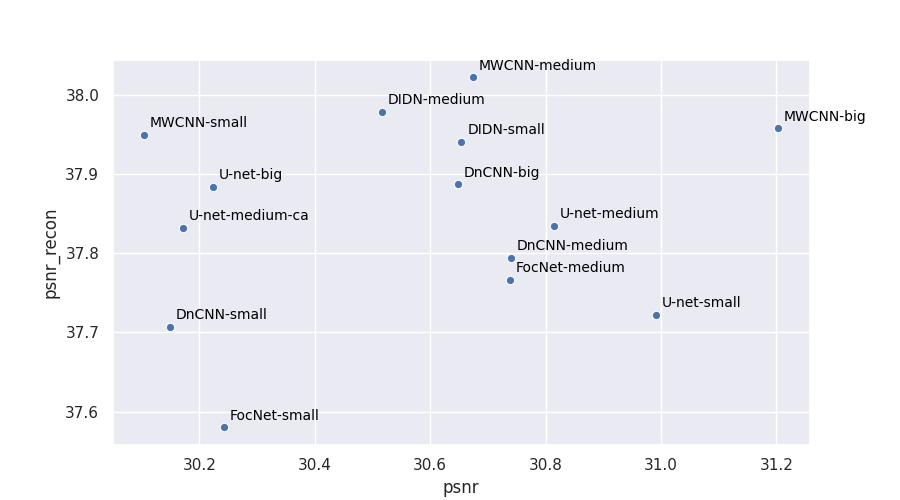

In [34]:
plt.figure()
p = sns.scatterplot(x='psnr', y='psnr_recon', data=df_all)
for line in range(0, df_all.shape[0]):
    p.text(
        df_all.psnr[line]+0.01, 
        df_all.psnr_recon[line]+0.01, 
        df_all.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )

<IPython.core.display.Javascript object>


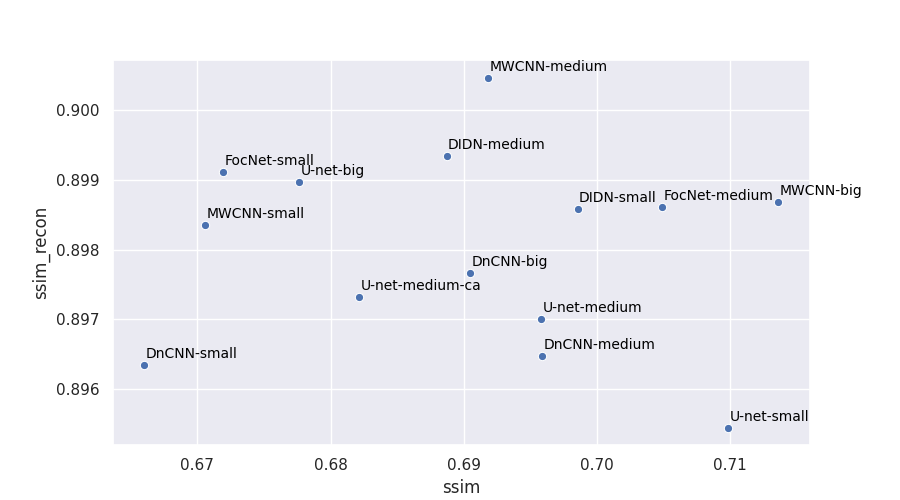

In [36]:
plt.figure()
p = sns.scatterplot(x='ssim', y='ssim_recon', data=df_all)
for line in range(0, df_all.shape[0]):
    p.text(
        df_all.ssim[line]+0.0001, 
        df_all.ssim_recon[line]+0.0001, 
        df_all.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )

## Reconstruction perfoamce function of n params

<IPython.core.display.Javascript object>


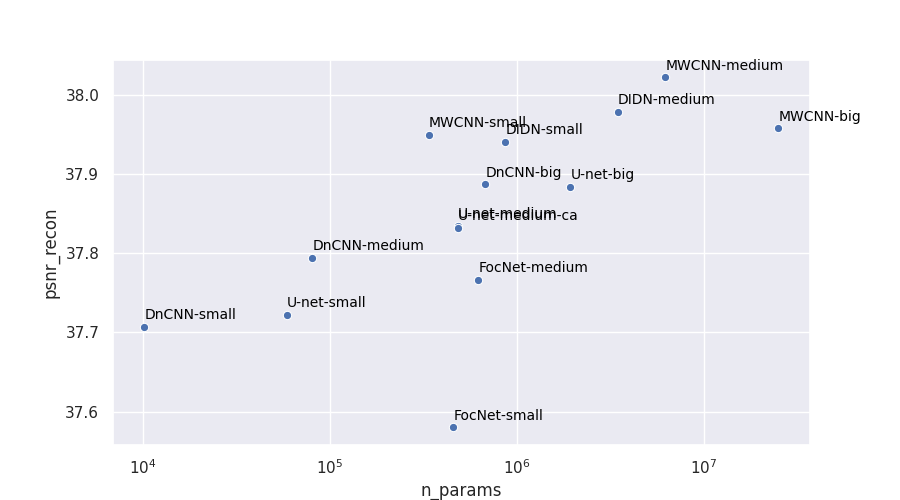

In [37]:
plt.figure()
plt.xscale('log')
p = sns.scatterplot(x='n_params', y='psnr_recon', data=df_all)
for line in range(0, df_all.shape[0]):
    p.text(
        df_all.n_params[line], 
        df_all.psnr_recon[line]+0.01, 
        df_all.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )

<IPython.core.display.Javascript object>


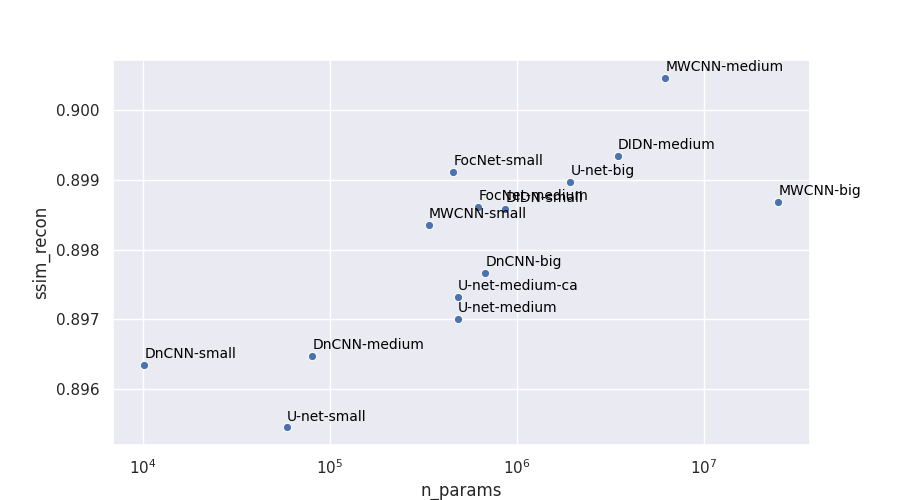

In [38]:
plt.figure()
plt.xscale('log')
p = sns.scatterplot(x='n_params', y='ssim_recon', data=df_all)
for line in range(0, df_all.shape[0]):
    p.text(
        df_all.n_params[line], 
        df_all.ssim_recon[line]+0.0001, 
        df_all.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )

## Reconstruction performance at af 4 function of af 2

In [40]:
df_reconstruction = pd.read_csv('reconstruction_results_None.csv', index_col=0)
df_reconstruction_af2 = pd.read_csv('reconstruction_results_af_2.csv', index_col=0)
df_reconstruction_af2['psnr_af2'] = df_reconstruction_af2['psnr']
df_reconstruction_af2 = df_reconstruction_af2.drop('psnr', axis=1)
df_reconstruction_af2['ssim_af2'] = df_reconstruction_af2['ssim']
df_reconstruction_af2 = df_reconstruction_af2.drop('ssim', axis=1)

In [42]:
df_all_recon = df_reconstruction.merge(df_reconstruction_af2, on=['model_name', 'model_size'])
df_all_recon['model_denomination'] = df_all_recon[['model_name', 'model_size']].agg('-'.join, axis=1)

In [44]:
df_all_recon

,model_name,model_size,psnr,ssim,psnr_af2,ssim_af2,model_denomination
0,DIDN,medium,35.181260,0.837218,37.978504,0.899347,DIDN-medium
1,DIDN,small,35.091831,0.835335,37.939903,0.898588,DIDN-small
2,DnCNN,big,34.947011,0.833006,37.886719,0.897657,DnCNN-big
3,DnCNN,medium,34.843274,0.831748,37.793777,0.896469,DnCNN-medium
4,DnCNN,small,34.413519,0.825539,37.706463,0.896347,DnCNN-small
5,FocNet,medium,35.210394,0.837451,37.766164,0.898610,FocNet-medium
6,FocNet,small,35.047057,0.835027,37.579900,0.899110,FocNet-small
7,MWCNN,big,35.235768,0.837658,37.957500,0.898677,MWCNN-big
8,MWCNN,medium,35.110500,0.835500,38.021805,0.900472,MWCNN-medium
9,MWCNN,small,35.180771,0.836993,37.948799,0.898356,MWCNN-small


<IPython.core.display.Javascript object>


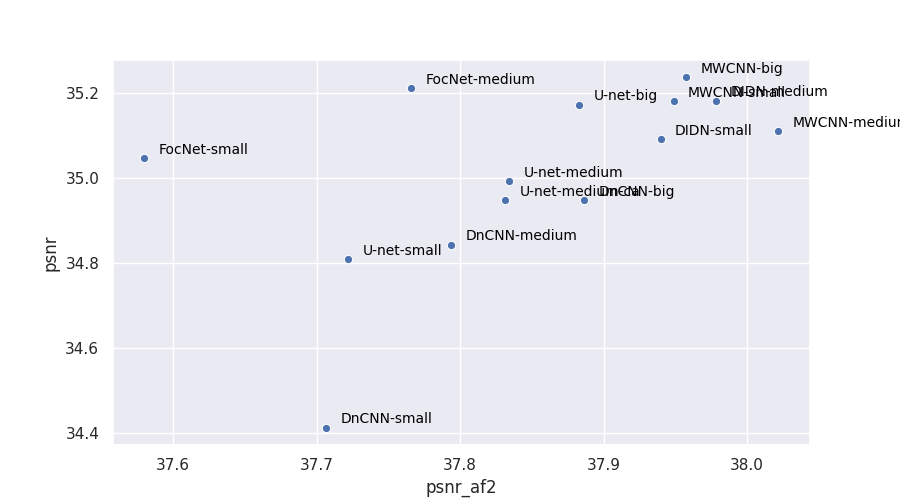

In [45]:
plt.figure()
p = sns.scatterplot(x='psnr_af2', y='psnr', data=df_all_recon)
for line in range(0, df_all_recon.shape[0]):
    p.text(
        df_all_recon.psnr_af2[line]+0.01, 
        df_all_recon.psnr[line]+0.01, 
        df_all_recon.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )

<IPython.core.display.Javascript object>


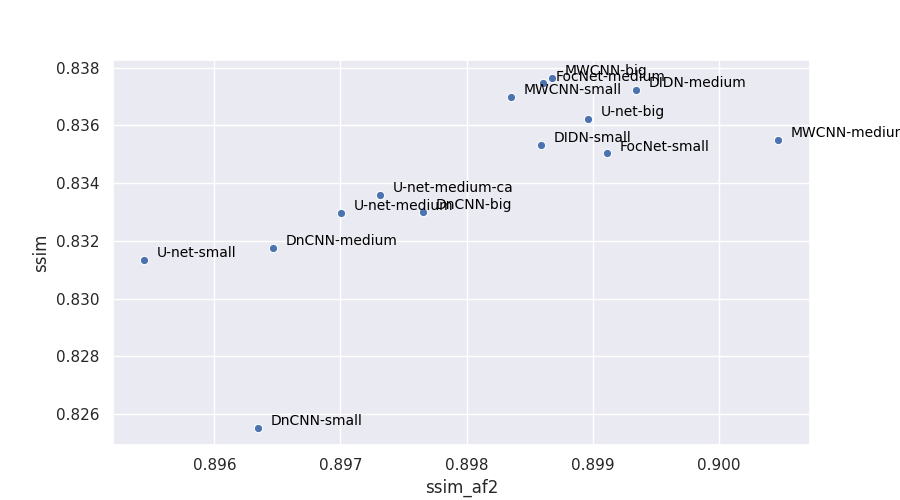

In [47]:
plt.figure()
p = sns.scatterplot(x='ssim_af2', y='ssim', data=df_all_recon)
for line in range(0, df_all_recon.shape[0]):
    p.text(
        df_all_recon.ssim_af2[line]+0.0001, 
        df_all_recon.ssim[line]+0.0001, 
        df_all_recon.model_denomination[line], 
        horizontalalignment='left', 
        size='small', 
        color='black', 
    )